In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [2]:
train = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\train.csv')
test = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\test.csv')
submit = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\head_submit_sample.csv')

In [3]:
#score列の作成
train['score'] = np.zeros(train.shape[0])


#個人ローン
#学習データ
loan_none = train.loc[train['loan'] == 'no']
index = loan_none.index.values
index = list(index)

for i in index:
    train.iloc[i,18] = 1
    


#住宅ローン
housing_none = train.loc[train['housing'] == 'no']
index = housing_none.index.values
index = list(index)

score_values = housing_none['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['housing']=='no','score'] = i



#債務不履行
default = train.loc[train['default'] == 'yes']


score_values = default['score'].values
score_values = score_values - 3
score_values = list(score_values)

for i in score_values:
    train.loc[train['default']=='yes','score'] = i





#経営者
management = train.loc[train['job'] == 'management']


score_values = management['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='management','score'] = i
    


#管理者
admin = train.loc[train['job'] == 'admin.']


score_values = admin['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='admin.','score'] = i
    



#学生
student = train.loc[train['job'] == 'student']


score_values = student['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='student','score'] = i
    




#失業者
unemployed = train.loc[train['job'] == 'unemployed']


score_values = unemployed['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='unemployed','score'] = i
    
train.loc[train['job'] == 'unemployed']




#定年退職者
retired = train.loc[train['job'] == 'retired']


score_values = retired['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='retired','score'] = i

In [4]:
#テストデータ
#score列の作成
test['score'] = np.zeros(test.shape[0])

#個人ローン
loan_none = test.loc[test['loan'] == 'no']
index = loan_none.index.values
index = list(index)

for i in index:
    test.iloc[i,17] = 1



#住宅ローン
housing_none = test.loc[test['housing'] == 'no']

score_values = housing_none['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['housing']=='no','score'] = i



#債務不履行
default = test.loc[test['default'] == 'yes']


score_values = default['score'].values
score_values = score_values - 3
score_values = list(score_values)

for i in score_values:
    test.loc[test['default']=='yes','score'] = i





#経営者
management = test.loc[test['job'] == 'management']


score_values = management['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='management','score'] = i
    


#管理者
admin = test.loc[test['job'] == 'admin.']


score_values = admin['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='admin.','score'] = i
    



#学生
student = test.loc[test['job'] == 'student']


score_values = student['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='student','score'] = i
    




#失業者
unemployed = test.loc[test['job'] == 'unemployed']


score_values = unemployed['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='unemployed','score'] = i
    



#定年退職者
retired = test.loc[test['job'] == 'retired']


score_values = retired['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='retired','score'] = i
    


In [5]:
#jobの欠損値処理
test.replace({'job': {'unknown':'blue-collar'}}, inplace=True)

#totalカラムの追加
#before = train.previous.values
#carent = train.campaign.values
##total = before + carent
#train['total'] = total

#before = test.previous.values
#carent = test.campaign.values
#total = before + carent
#test['total'] = total


#各データセットの作成
#train_x1 = train.iloc[:,1:17]
#train_x2 = train.iloc[:,18:]
#train_x = pd.concat([train_x1,train_x2], axis=1)
train_x =train.iloc[:,1:17]
train_x['score'] = train['score']
train_y = train['y']
test_x = test.iloc[:,1:]

In [6]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
#LabelEncording
for c in cat_cols:
    le = LabelEncoder()
    le.fit(train_x[c])
    train_x[c] = le.transform(train_x[c])
    test_x[c] = le.transform(test_x[c])




#hold out 法
kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x,va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y,va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx] 

In [7]:
clf = Ridge()
clf.fit(tr_x, tr_y)
va_pred = clf.predict(va_x)
score = log_loss(va_y,va_pred)
print(score)

0.27768657268927416


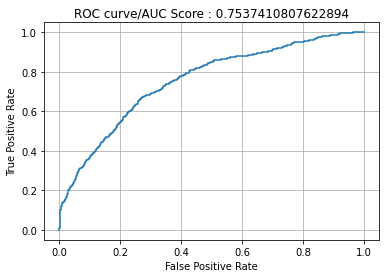

In [8]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(va_y,va_pred)
auc_score = roc_auc_score(va_y,va_pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [10]:
test_pred = clf.predict(test_x)

In [11]:
id = test['id']
test_pred = pd.Series(test_pred)
pred = test_pred

submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.448991
1,1,0.034428
2,2,0.032074
3,3,0.045364
4,4,0.050547
...,...,...
18045,18045,-0.018477
18046,18046,0.048991
18047,18047,0.057178
18048,18048,0.027868


In [13]:
submit

,id,y
0,0,0.448991
1,1,0.034428
2,2,0.032074
3,3,0.045364
4,4,0.050547
...,...,...
18045,18045,-0.018477
18046,18046,0.048991
18047,18047,0.057178
18048,18048,0.027868


In [15]:
submit.to_csv('Logistic.csv',index=False)